# HEART RATE ESTIMATION

Seismocardiography([SCG](https://www.ncbi.nlm.nih.gov/pubmed/24111357)) is a very promising technique to measure Heart Rate (HR) and Respiratory Rate (RR) with the detector positioned above sternum. It is generally based on accelerometer and gyroscope readings or a combination of them. 

Ballistocardiography([BCG](https://en.wikipedia.org/wiki/Ballistocardiography)) is an another technique to estimate heart and respiratory rate with combination of both accelerometer and gyroscope. It is an indirect evaluation of HR and RR since the contact between the device and the body of the subject is not required (e.g., accelerometer platform mounted under the slats of the bed).   
  
MuSe(Multi-Sensor miniaturized, low-power, wireless [IMU](https://en.wikipedia.org/wiki/Inertial_measurement_unit)) is an Inertial Measurement Unit (IMU) provide by [221e](https://www.221e.com). In the context of this project, It allows to record the inertial data necessary for the estimation of SCG and BCG.

The goal of this assignment is to estimate the heart rate of an healthy subject, given linear acceleration and angular velocity measurements recorded by using the aforementioned MuSe platform. 
The study must be performed on two datasets: the first is the compulsory one (**center_sternum.txt**) while the second is left at the discretion of the group, among those made available for the assignment.

**N.B: Remember that normal beat is around [40-100] bpm.**


## Dataset

The data is provided in .txt file. During this study two healthy subjects were involved with their informed consent. The first dataset was recorded on one subject, while all the other datasets were recorded on the second subject. 

This is the first mandatory file:

* **center_sternum.txt**: MuSe placed on the center of the sternum. The subject was lying supine on his left and right side, respectively. 


Choose one of the following files in order to complete the task.

1. **1_Stave_supine_static.txt**: Sensor placed on a bed stave, under the mattress at the level of the chest. The subject was lying supine on his left and right side. 
* **2_Mattress_supine.txt**: Sensor placed on the mattress, near one corner but not under the pillow. The subject laid in the same position as above. 
* **3_Subject_sitting_chair.txt**: Sensor placed on the desk: the subject, sitting on a chair, leaned forearms and hands on the desk. 
* **4_Chest_sweater.txt**: Sensor placed on the subject chest directly on a sweater. 
* **5_Under_chair.txt**: Subject sitting on a chair, sensor placed under the seat of the chair. 

All .txt files give 16 columns index, in particular: 

* Log Freq stands for the acquisition  in Hz (i.e., sampling interval is constant).
* AccX, AccY, AccZ are the measured magnitude of linear acceleration along each axis.
* GyroX, GyroY, GyroZ are the measured magnitude of angular velocity along each axis.
* MagnX, MagnY, MagnZ are the measured magnitude of magnetic field along each axis.
* qw, qi, qj, qk are the quaternion components, representing the spatial orientation of the Muse system.

Each dataset includes, in addition to the data, one file containing the adopted configuration of the MuSe(**README1.txt** for the first measurement, and in **README_5.txt** for the other measurement).
 


## Assignment



1. Data preparation:

    1.1. Load the txt file and select only the columns you are interesting in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )
    
    1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.
    
    1.3. In order to make an appropiate work, decide if take care about some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.  


    
2. Time and frequency analysis:

    2.1. Statistical analysis: provide a statistical description of the chosen dataset. Statistical descriptors includes for example mean, median, variance, standard deviation, 25th and 75th percentiles, and correlation coefficients. Investigate what could be the most interesting descriptors for this type of data, motivating the choices.
    
    2.2. Fourier Analysis: Perform a frequency analysis of the data. Look at the spectrum and explain what you see. Use this step in order to properly design the filters in the following step. 



3. Filter:
    
    Implement your own filter, trying to extrapolate heart rate signal. Hint:
    
    (a) Directly from Fourier Analysis, antitrasform data looking for the most interesting frequency band.
    
    (b) Choose the appropriate Lowpass/Bandpass/Highpass filter.
    
    (c) Wavelet trasform (a powerfull instrument that make a time and frequency analysis of signal).
    
    (d) Find another method by yourselves.
    
    Motivate your choice.
    
    
4. Metrics:

    4.1. Heart Beat Per Minute(BPM): extrapolate BPM, make an histogram of the result. Does it follow a partiular distribution? 
    
    4.2. Heart Rate Variability(HRV): extrapolate HRV, explain why this parameter is important, and plot the results.



5. (OPTIONAL) Algorithm: Elaborate a simple algorithm to extrapolate heart beat even when filter failed (e.g. look at particular threshold...).  



6. Conclusion: 

    Summarise the obtained results, in particular making a comparison between the two files analysed. Highlight limitation and critical issues encountered during the work, motivating the most relevant contribution given by your solution.




**N.B: Indicate the contribution, to achieving the result, of each member of the group.**


Data preparation:

1.1. Load the txt file and select only the columns you are interesting in, in order to do a complete data analysis (e.g. Log Freq, AccX, ... )

1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.

1.3. In order to make an appropiate work, decide if take care about some particular axis or some combination of them as well as derived features for the next step of the task. Motivate your choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd1 = pd.read_csv('center_sternum.txt', delimiter='\t')
center_sternum = pd.DataFrame(pd1)
display(center_sternum)
center_sternum.describe()

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
count,16506.0,16506.0,1.650600e+04,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000,16506.000000
mean,5.0,200.0,1.576223e+09,35.603752,121.754422,-897.001465,-1.885665,3.636535,-0.818354,-231.327881,-432.637405,397.903005,0.063803,0.490530,-0.764329,-0.039947
std,0.0,0.0,2.189258e+01,232.624330,62.077114,215.230574,13.223364,17.399954,10.595643,67.200320,16.526077,123.871453,0.144073,0.197328,0.326346,0.057694
min,5.0,200.0,1.576223e+09,-722.118000,-387.838000,-1731.973000,-359.496200,-213.557300,-126.351100,-511.000000,-559.000000,-178.000000,0.004428,-0.622059,-0.892911,-0.096347
25%,5.0,200.0,1.576223e+09,-35.258000,111.020000,-958.310000,-2.839695,3.206107,-1.175573,-213.000000,-434.000000,427.000000,0.021518,0.493858,-0.859676,-0.060732
50%,5.0,200.0,1.576223e+09,-29.585000,115.900000,-948.733000,-2.137405,3.664122,-0.854962,-212.000000,-432.000000,429.000000,0.024636,0.529649,-0.836619,-0.059511
75%,5.0,200.0,1.576223e+09,-22.692000,120.475000,-937.692000,-1.206107,4.213740,-0.549618,-211.000000,-431.000000,433.000000,0.027304,0.564768,-0.813227,-0.057619
max,5.0,200.0,1.576223e+09,1228.601000,1004.609000,3087.000000,381.160300,349.816800,187.603100,-130.000000,-289.000000,481.000000,0.792622,0.624806,0.921293,0.251900


In [3]:
pd2 = pd.read_csv('2_Mattress_supine.txt', delimiter='\t')
mat_supine = pd.DataFrame(pd1)
display(mat_supine)
mat_supine.describe()
mat_supine.columns

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


Index(['Log Mode', 'Log Freq', 'Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ', 'qw', 'qi', 'qj', 'qk'],
      dtype='object')

In [4]:
# test code
# # df.loc[:,['A','B']]
# aa = mat_supine.loc[:,['Log Freq','AccX']]
# display(aa)

# # df.drop(['E prime'], axis=1)

# bb = mat_supine.drop(['Log Freq'], axis = 1)
# display(bb)

#len(center_sternum_d.index)

The goal of this assignment is to estimate the heart rate of a healthy subject, given linear acceleration and angular velocity measurements 

* Log Freq stands for the acquisition  in Hz (i.e., sampling interval is constant).
* AccX, AccY, AccZ are the measured magnitude of linear acceleration along each axis.
* GyroX, GyroY, GyroZ are the measured magnitude of angular velocity along each axis.
* MagnX, MagnY, MagnZ are the measured magnitude of magnetic field along each axis.
* qw, qi, qj, qk are the quaternion components, representing the spatial orientation of the Muse system.


In [5]:
frq = center_sternum['Log Freq'].unique()[0]
print(frq)

center_sternum_d = center_sternum.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
# display(center_sternum_d)
center_sternum_d.head(5)
center_sternum_d.insert(0, "Time", np.arange(0,(len(center_sternum_d.index)/frq),(1/frq)))
center_sternum_d

200


,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
1,0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
2,0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
3,0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
4,0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
16502,82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
16503,82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763
16504,82.520,965.630,300.852,-56.242,0.702290,3.664122,-1.587786


1.2. Plot selected data in function of time and choose a properly time window over which to perform the analysis. Pay attention on time rappresentation and the measurament unit.

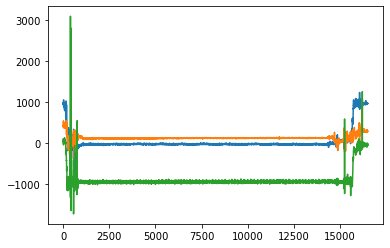

In [6]:
plt.plot(center_sternum_d['AccX'])
plt.plot(center_sternum_d['AccY'])
plt.plot(center_sternum_d['AccZ'])

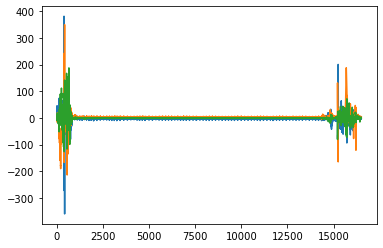

In [7]:
plt.plot(center_sternum_d['GyroX'])
plt.plot(center_sternum_d['GyroY'])
plt.plot(center_sternum_d['GyroZ'])

In [8]:
#sns.pairplot(center_sternum_d)

In [9]:
# timestamp mattress 
#mat_supine.Timestamp.unique()

In [10]:
#mat_supine.Timestamp.value_counts()

1.1
- we dropped magnetisation, spatial orientation and log mode (maybe timestamp too)
- we dropped time stamp and log freq, instead we use Time column to represent time in secs instead of arbitrary unit.
- timestamp have repetitive values that may represent a meaningful division of the data, but there's no info that supports it for now (ignore this)

1.2
- so we just plotted all the data per type, and saw similar behaviours for each type of measurement (X,Y,Z corresponing to the same physical meaning behave in the same way)
- from such behaviours, we-re going to have to crop a bit from the beginning and from the end of the data: **we need to find a criteria (based on the histogram) for cropping of the data from beginning and end**

1.3
- to decide which axis and info to keep analysing, perform a PCA (since the professor is speaking about combinations of the components, what about considering spherical coordinates?)
2.1
- statistical description of data
- FFT

In [11]:
#doing the same for mattress data

frq = mat_supine['Log Freq'].unique()[0]


ms = mat_supine.drop(['MagnX','MagnY','MagnZ','qw','qi','qj','qk','Log Mode','Log Freq','Timestamp'], axis = 1)
# display(center_sternum_d)
ms.head(5)
ms.insert(0, "Time", np.arange(0,(len(ms.index)/frq),(1/frq)))
ms

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,947.086,435.662,70.638,-6.824428,-14.244280,1.404580
1,0.005,969.168,387.777,88.877,6.183206,-12.290080,-7.969466
2,0.010,989.603,380.335,78.751,11.709920,-4.961832,-7.450382
3,0.015,954.894,418.033,88.328,17.877860,2.519084,-5.984733
4,0.020,972.096,427.732,99.857,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,958.493,291.092,-54.290,1.664122,2.305344,-0.671756
16502,82.510,954.650,288.042,-49.654,1.480916,2.488550,-0.702290
16503,82.515,967.338,290.482,-63.867,1.114504,3.374046,-0.900763
16504,82.520,965.630,300.852,-56.242,0.702290,3.664122,-1.587786


# Adding offsets, plotting data, dropping some data

Please add here ok cells of work before so it will be not messy now

In [12]:
########24.01.22 upd

###PREVIOUSLY NO COMSIDERATION OF OFFSETS
#added here to accelerometer 


### center sternum README1
acc_offsets1 = np.array([-3.929942, -13.74679, 60.67546])


cs = center_sternum_d
cs['AccX'] += acc_offsets1[0]
cs['AccY'] += acc_offsets1[1]
cs['AccZ'] += acc_offsets1[2]




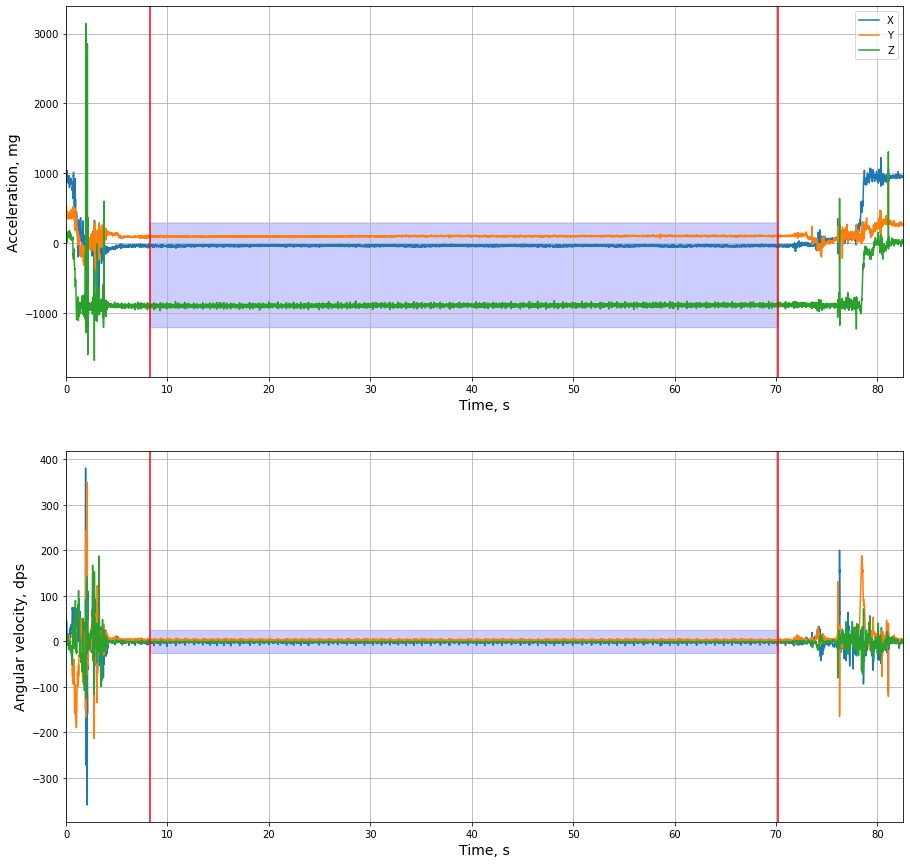

In [13]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)

down_limit = 0.1*max(cs['Time']) #I was exploring it visually with step 0.05
up_limit = 0.85*max(cs['Time'])
fill0 = np.arange(-1200,300)  #y range of the highlited visual aid for fig 0
fill1 = np.arange(-25,25) #y range of the highlited visual aid for fig 1

ax[0].plot(cs['Time'], cs['AccX'], label='X')
ax[0].plot(cs['Time'], cs['AccY'], label='Y')
ax[0].plot(cs['Time'], cs['AccZ'], label='Z')
ax[0].set_xlim(min(cs['Time']),max(cs['Time']))
ax[0].set_xlabel('Time, s', fontsize=14)
ax[0].set_ylabel('Acceleration, mg', fontsize=14)
ax[0].axvline(down_limit, color='red')
ax[0].axvline(up_limit, color='red')
ax[0].legend()
ax[0].grid()
ax[0].fill_betweenx(fill0,down_limit,up_limit, color='blue', alpha =0.2)


ax[1].plot(cs['Time'], cs['GyroX'], label='X')
ax[1].plot(cs['Time'], cs['GyroY'], label='Y')
ax[1].plot(cs['Time'], cs['GyroZ'], label='Z')
ax[1].set_xlim(min(cs['Time']),max(cs['Time']))
ax[1].set_xlabel('Time, s', fontsize=14)
ax[1].set_ylabel('Angular velocity, dps', fontsize=14)
ax[1].axvline(down_limit, color='red')
ax[1].axvline(up_limit, color='red')
ax[1].grid()
ax[1].fill_betweenx(fill1,down_limit,up_limit, color='blue', alpha =0.2)


I found another gyroscope description, dps - dimensionless numbers.
IDK if we use it, but conversion should be like
$w[rad*s^{-1}] = \frac{w_{raw}*200}{2^{15}}*\frac{\pi}{180}$

200 is taken from README1

In [14]:
#dropping data

cs.drop(cs[ cs['Time']<= down_limit].index, inplace=True)
cs.drop(cs[ cs['Time']>= up_limit].index, inplace=True)
cs

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
1651,8.255,-40.224942,103.98321,-908.37054,-3.297710,3.847328,-0.687023
1652,8.260,-36.869942,106.36221,-924.90154,-3.801527,4.381680,-0.595420
1653,8.265,-47.483942,93.06421,-886.65454,-3.847328,4.351145,0.045802
1654,8.270,-36.320942,97.02921,-902.94154,-3.954199,4.412214,0.259542
1655,8.275,-37.662942,95.19921,-894.64554,-4.167939,3.480916,0.015267
...,...,...,...,...,...,...,...
14025,70.125,-48.825942,116.48821,-910.20054,-3.312977,1.984733,-0.977099
14026,70.130,-46.934942,114.78021,-900.19654,-7.282443,1.938931,-1.480916
14027,70.135,-40.041942,110.44921,-852.06754,-8.870229,2.564886,-1.450382
14028,70.140,-47.239942,108.86321,-844.74754,-7.129771,3.648855,-1.389313


In [15]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!! redefining index

cs.set_index(np.arange(len(cs)),inplace=True)
cs

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,8.255,-40.224942,103.98321,-908.37054,-3.297710,3.847328,-0.687023
1,8.260,-36.869942,106.36221,-924.90154,-3.801527,4.381680,-0.595420
2,8.265,-47.483942,93.06421,-886.65454,-3.847328,4.351145,0.045802
3,8.270,-36.320942,97.02921,-902.94154,-3.954199,4.412214,0.259542
4,8.275,-37.662942,95.19921,-894.64554,-4.167939,3.480916,0.015267
...,...,...,...,...,...,...,...
12374,70.125,-48.825942,116.48821,-910.20054,-3.312977,1.984733,-0.977099
12375,70.130,-46.934942,114.78021,-900.19654,-7.282443,1.938931,-1.480916
12376,70.135,-40.041942,110.44921,-852.06754,-8.870229,2.564886,-1.450382
12377,70.140,-47.239942,108.86321,-844.74754,-7.129771,3.648855,-1.389313


# PCA on acceleration

In [16]:
acc_PCA = pd.DataFrame(columns=['AccX', 'AccY', 'AccZ'], index=cs.index)
acc_PCA['AccX'] = cs['AccX']
acc_PCA['AccY'] = cs['AccY']
acc_PCA['AccZ'] = cs['AccZ']

In [17]:
acc_PCA

,AccX,AccY,AccZ
0,-40.224942,103.98321,-908.37054
1,-36.869942,106.36221,-924.90154
2,-47.483942,93.06421,-886.65454
3,-36.320942,97.02921,-902.94154
4,-37.662942,95.19921,-894.64554
...,...,...,...
12374,-48.825942,116.48821,-910.20054
12375,-46.934942,114.78021,-900.19654
12376,-40.041942,110.44921,-852.06754
12377,-47.239942,108.86321,-844.74754


In [18]:
import scipy.linalg as la
cov = np.cov(acc_PCA.T)
l, V = la.eig(cov)
l = np.real_if_close(l)
print(l)

for i in range(len(l)):
    print(100*l[i]/sum(l))

[221.38155088  40.20397591  26.6692512 ]
76.80065268085114
13.94737536929249
9.251971949856376


We see that if we keep only X component we will have the 76% of total variability of the dataset

In [19]:
#rotating data

acc_rot = np.dot(V.T, acc_PCA.T)

acc_rotated = pd.DataFrame(data=acc_rot.T, columns=['AccX_new','AccY_new','AccZ_new'], index=np.arange(len(acc_PCA)))
acc_rotated

,AccX_new,AccY_new,AccZ_new
0,862.961630,287.947157,-99.755956
1,879.591209,289.485516,-103.114554
2,841.030643,286.630970,-87.075193
3,859.141548,281.202354,-94.012440
4,850.924241,279.950316,-91.802976
...,...,...,...
12374,861.772244,299.597993,-109.581663
12375,852.651264,294.930004,-108.320405
12376,807.959926,275.514550,-105.422809
12377,799.292391,280.044585,-101.921150


New ONE coordinate: $$\sqrt{x^2 + y^2 + z^2}$$

In [20]:
data_R = pd.DataFrame(columns=['R', 'Time'],index=np.arange(len(acc_rotated)))
data_R['R'] = np.sqrt(acc_rotated['AccX_new']**2 + acc_rotated['AccY_new']**2 + acc_rotated['AccZ_new']**2)
data_R['Time'] = cs['Time']
data_R

,R,Time
0,915.187190,8.255
1,931.726983,8.260
2,892.788858,8.265
3,908.865943,8.270
4,900.484330,8.275
...,...,...
12374,918.922466,70.125
12375,908.697527,70.130
12376,860.128757,70.135
12377,853.042330,70.140


Later - same things as for X component but for R

Text(0, 0.5, 'Acceleration, mg')

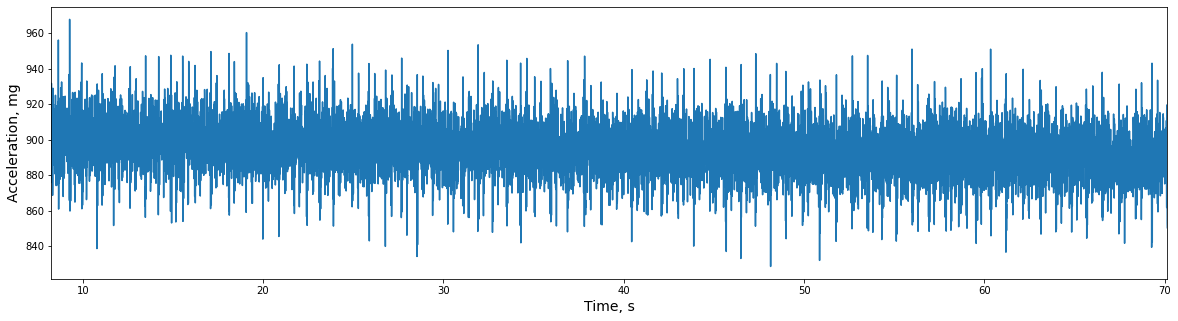

In [21]:
plt.figure(figsize=(20,5))
plt.plot(data_R['Time'], data_R['R'])
plt.xlim(min(data_R['Time']),max(data_R['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Acceleration, mg', fontsize=14)

In [22]:
print('Statistical analysis')
print(data_R['R'].describe())
print('median', data_R['R'].median())
print('variance', data_R['R'].var())

Statistical analysis
count    12379.000000
mean       895.116630
std         14.197064
min        828.592128
25%        887.464617
50%        895.497850
75%        903.446218
max        967.760021
Name: R, dtype: float64
median 895.4978500594041
variance 201.55661296018567


FFT for R data

Signal size: 12379
Peak Freq in range of 40BPM to 100 BPM is  1.1471039663947007 Beat per Sec
In BPM is 68.82623798368203


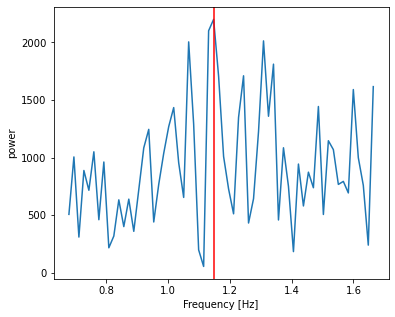

In [23]:
# The FFT of the signal Z around the area of heart beat frequencies
from scipy import fftpack

data_AccR = np.asarray(data_R['R'])

R_fft = fftpack.fft(data_AccR)
print("Signal size:",data_AccR.size)
# And the power (sig_fft is of complex dtype)
power_R = np.abs(R_fft)

timestep = 1/200
# The corresponding frequencies
sample_freq_R = fftpack.fftfreq(data_AccR.size, d=timestep)
#print(sample_freq)

# Adjust mask to freq of heart beat (40bpm and  100 bpm) translate it to sec
pos_mask_R = np.where((40/60 <= sample_freq_R) & (sample_freq_R <= 100/60) )
# pos_mask = np.where(sample_freq > 0)
freqs_R = sample_freq_R[pos_mask_R]
peak_freq_R = freqs_R[power_R[pos_mask_R].argmax()]

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(freqs_R, power_R[pos_mask_R])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.axvline(peak_freq_R, color='red')

print("Peak Freq in range of 40BPM to 100 BPM is ", peak_freq_R , "Beat per Sec")
print("In BPM is", peak_freq_R*60)

Invert FFT if we cut out freq bigger than our peak freq


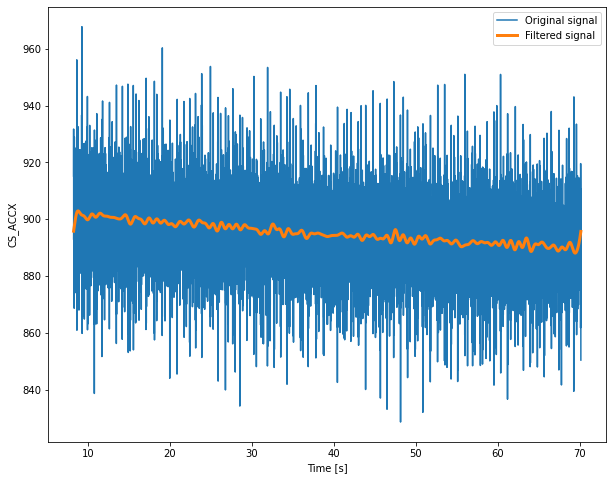

In [24]:
high_freq_fft_R = R_fft.copy()
high_freq_fft_R[(np.abs(sample_freq_R) >= peak_freq_R)] = 0
filtered_sig_R = fftpack.ifft(high_freq_fft_R).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], data_AccR, label='Original signal')
plt.plot(cs['Time'], filtered_sig_R, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('CS_ACCX')

plt.legend(loc='best')
print("Invert FFT if we cut out freq bigger than our peak freq")

Just Signal between 40 - 100 BPM


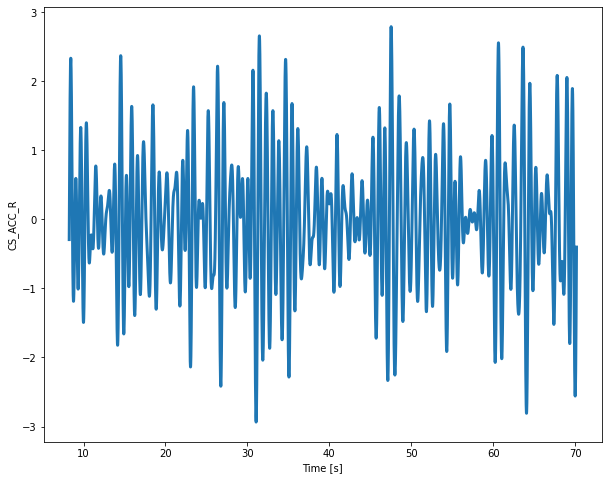

In [25]:
# Freq between 40BPM to 100 BPM
blocked_fft_R = R_fft.copy()
blocked_fft_R[(np.abs(sample_freq_R) >= 100/60)] = 0
blocked_fft_R[(np.abs(sample_freq_R) <= 40/60)] = 0
blocked_R = fftpack.ifft(blocked_fft_R).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], blocked_R, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('CS_ACC_R')

print("Just Signal between 40 - 100 BPM")

In [26]:
import pywt

In [27]:
# this code to toy around
# # cd8,cd7,cd6,cd5
# ca,cd7,cd6,cd5,cd4,cd3,cd2,cd1 = pywt.wavedec(blocked_R, 'sym4', level=7 )
# ca = np.zeros(ca.shape)
# cd8 = np.zeros(cd8.shape)
# # cd7 = np.zeros(cd7.shape)
# cd6 = np.zeros(cd6.shape)
# cd5 = np.zeros(cd5.shape)
# cd4 = np.zeros(cd4.shape)
# cd3 = np.zeros(cd3.shape)
# cd2 = np.zeros(cd2.shape)
# cd1 = np.zeros(cd1.shape)

# # cd 7 has value, the rest is 0
# yx = pywt.waverec( [ca,cd7,cd6,cd5,cd4,cd3,cd2,cd1], 'sym4' )
# # plt.plot(filter_sigs_z)
# # plt.plot(cs['Time'], yx[0:12379])
# # plt.plot(cs['Time'][100:2000], blocked_R[100:2000], label ="signal")
# plt.plot(cs['Time'][3000:4500], yx[3000:4500], label ="wavelet")
# plt.legend()
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

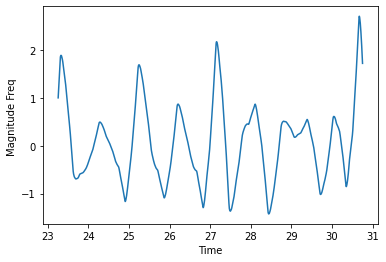

In [28]:
# this the neat one
i = 7
coef = pywt.wavedec(blocked_R, 'sym4', level=i )

for k in range (i):
    if k != 1: 
        coef[k] = np.zeros(coef[k].shape)

# cd 7 has value, the rest is 0
yx = pywt.waverec( coef, 'sym4' )
plt.plot(cs['Time'][3000:4500], yx[3000:4500]) #blocked the time frame to see the wave better
plt.xlabel ("Time")
plt.ylabel ("Magnitude Freq ") #not sure this is the right name for the y axis
plt.show

In [29]:
from scipy.signal import find_peaks

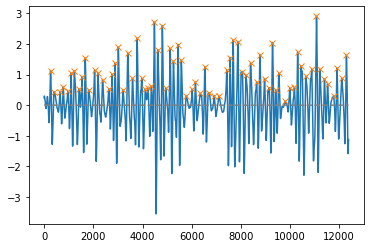

In [30]:
x = yx
peaks, _ = find_peaks(x, width = 50) 
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [31]:
# BPM calculation based on peak detection
num_peak = len(peaks)
time  = cs['Time'].max() - cs['Time'].min()
bpm = num_peak/time*60 #times 60 for bpm
print('BPM is', bpm)

BPM is 68.83179835191468


In [32]:
peaks

array([  259,   407,   643,   773,   963,  1092,  1225,  1419,  1539,
        1669,  1806,  2050,  2184,  2374,  2627,  2756,  2884,  3014,
        3205,  3398,  3591,  3780,  3970,  4110,  4226,  4357,  4483,
        4617,  4805,  4941,  5123,  5256,  5444,  5576,  5775,  6019,
        6149,  6350,  6532,  6709,  6915,  7109,  7426,  7557,  7684,
        7875,  8065,  8206,  8392,  8642,  8773,  8963,  9154,  9285,
        9413,  9541,  9797,  9987, 10178, 10308, 10448, 10639, 10882,
       11076, 11209, 11398, 11525, 11778, 11908, 12101, 12292])

Text(0.5, 0, 'HRV (second)')

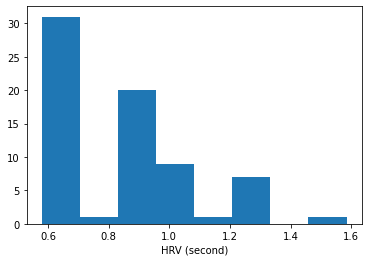

In [33]:
# histogram of HRV
times = np.asarray(cs['Time'])
hrv = np.zeros(len(peaks)-1)
for i in range (len(hrv)):
    hrv[i] = times[peaks[i+1]] - times[peaks[i]] 
plt.hist(hrv,bins=int(len(hrv)**0.5))
plt.xlabel ("HRV (second)")

Text(0.5, 0, 'HBM')

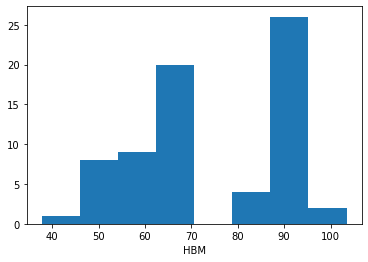

In [34]:
# histogram of BPM
plt.hist(1/hrv*60,bins=int(len(hrv)**0.5))
plt.xlabel ("HBM")

# Gyroscope


In [35]:
gyro_PCA = pd.DataFrame(columns=['GyroX', 'GyroY', 'GyroZ'], index=cs.index)
gyro_PCA['GyroX'] = cs['GyroX']
gyro_PCA['GyroY'] = cs['GyroY']
gyro_PCA['GyroZ'] = cs['GyroZ']

In [36]:
import scipy.linalg as la
cov1 = np.cov(gyro_PCA.T)
l1, V1 = la.eig(cov)
l1 = np.real_if_close(l1)
print(l1)

for i in range(len(l1)):
    print(100*l1[i]/sum(l1))
    
#just to see that it's the same

[221.38155088  40.20397591  26.6692512 ]
76.80065268085114
13.94737536929249
9.251971949856376


In [37]:
data_GR = pd.DataFrame(columns=['GR', 'Time'],index=np.arange(len(cs)))
data_GR['GR'] = np.sqrt(cs['GyroX']**2 +cs['GyroY']**2 + cs['GyroZ']**2)
data_GR['Time'] = cs['Time']
data_GR

,GR,Time
0,5.113592,8.255
1,5.831402,8.260
2,5.808312,8.265
3,5.930488,8.270
4,5.430352,8.275
...,...,...
12374,3.983680,70.125
12375,7.680270,70.130
12376,9.346829,70.135
12377,8.128836,70.140


Text(0, 0.5, 'Angular velocity, mg')

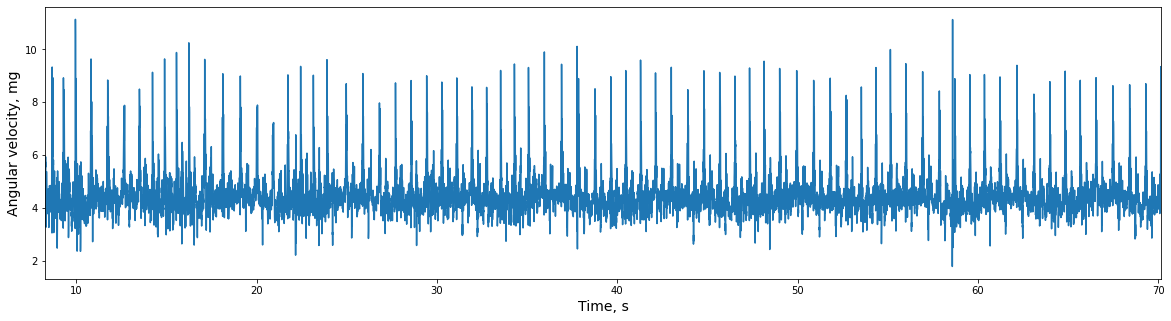

In [38]:
plt.figure(figsize=(20,5))
plt.plot(data_GR['Time'], data_GR['GR'])
plt.xlim(min(data_GR['Time']),max(data_GR['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Angular velocity, mg', fontsize=14)

Signal size: 12379
Peak Freq in range of 40BPM to 100 BPM is  1.163260360287584 Beat per Sec
In BPM is 69.79562161725504


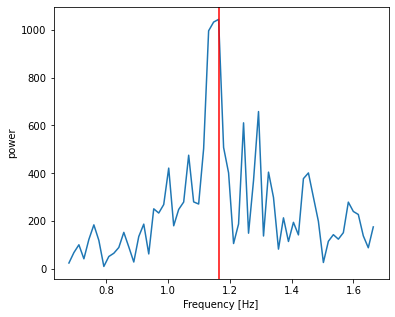

In [39]:
data_GyroR = np.asarray(data_GR['GR'])

GR_fft = fftpack.fft(data_GyroR)
print("Signal size:",data_GyroR.size)
# And the power (sig_fft is of complex dtype)
power_GR = np.abs(GR_fft)

timestep = 1/200
# The corresponding frequencies
sample_freq_GR = fftpack.fftfreq(data_GyroR.size, d=timestep)
#print(sample_freq)

# Adjust mask to freq of heart beat (40bpm and  100 bpm) translate it to sec
pos_mask_GR = np.where((40/60 <= sample_freq_GR) & (sample_freq_GR <= 100/60) )
# pos_mask = np.where(sample_freq > 0)
freqs_GR = sample_freq_GR[pos_mask_GR]
peak_freq_GR = freqs_GR[power_GR[pos_mask_GR].argmax()]

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(freqs_GR, power_GR[pos_mask_GR])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.axvline(peak_freq_GR, color='red')

print("Peak Freq in range of 40BPM to 100 BPM is ", peak_freq_GR , "Beat per Sec")
print("In BPM is", peak_freq_GR*60)

Invert FFT if we cut out freq bigger than our peak freq


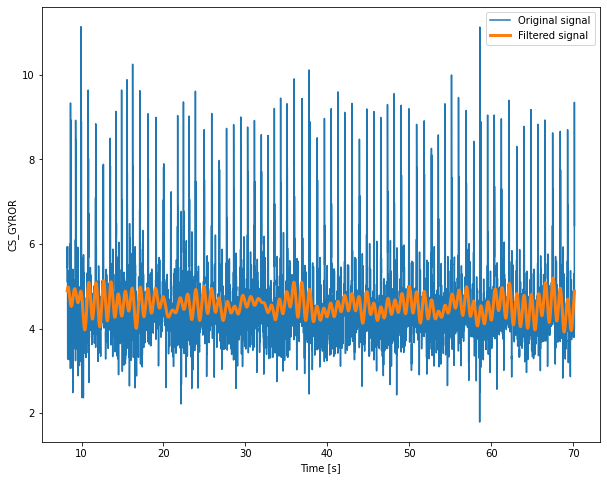

In [40]:
high_freq_fft_GR = GR_fft.copy()
high_freq_fft_GR[(np.abs(sample_freq_GR) >= peak_freq_GR)] = 0
filtered_sig_GR = fftpack.ifft(high_freq_fft_GR).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], data_GyroR, label='Original signal')
plt.plot(cs['Time'], filtered_sig_GR, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('CS_GYROR')

plt.legend(loc='best')
print("Invert FFT if we cut out freq bigger than our peak freq")

Just Signal between 40 - 100 BPM


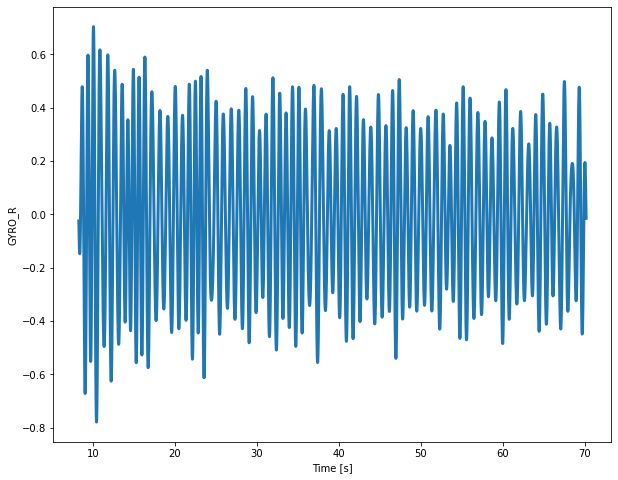

In [41]:
blocked_fft_GR = GR_fft.copy()
blocked_fft_GR[(np.abs(sample_freq_GR) >= 100/60)] = 0
blocked_fft_GR[(np.abs(sample_freq_GR) <= 40/60)] = 0
blocked_GR = fftpack.ifft(blocked_fft_GR).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], blocked_GR, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('GYRO_R')

print("Just Signal between 40 - 100 BPM")

<function matplotlib.pyplot.show(close=None, block=None)>

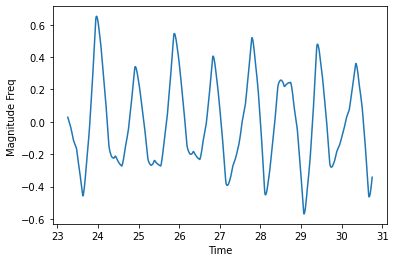

In [42]:
# this the neat one
i = 7
coef = pywt.wavedec(blocked_GR, 'sym4', level=i )

for k in range (i):
    if k != 1: 
        coef[k] = np.zeros(coef[k].shape)

# cd 7 has value, the rest is 0
yx = pywt.waverec( coef, 'sym4' )
plt.plot(cs['Time'][3000:4500], yx[3000:4500]) #blocked the time frame to see the wave better
plt.xlabel ("Time")
plt.ylabel ("Magnitude Freq ") #not sure this is the right name for the y axis
plt.show

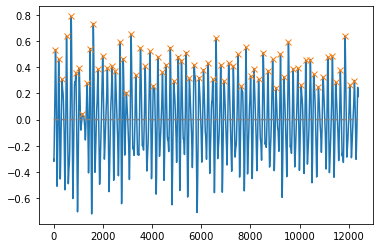

In [43]:
x = yx
peaks, _ = find_peaks(x, width = 50) 
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [44]:
# BPM calculation based on peak detection
num_peak = len(peaks)
time  = cs['Time'].max() - cs['Time'].min()
bpm = num_peak/time*60 #times 60 for bpm
print('BPM is', bpm)

BPM is 69.80126030053322


# GYRO R + ACC R heartbeat

In [45]:
# normalize data
R = np.asarray(data_R['R'])
norm_R = np.linalg.norm(R)
print(norm_R)

GR = np.asarray(data_GR['GR'])
norm_GR = np.linalg.norm(GR)
print(norm_GR)

99604.05531945456
514.5944453146054


In [46]:
data_GR_R = pd.DataFrame(columns=['GRR', 'Time'],index=np.arange(len(cs)))
data_GR_R['GRR'] = ((data_R['R']/norm_R)**2 + (data_GR['GR']/norm_GR)**2)**0.5
data_GR_R['Time'] = cs['Time']
data_GR_R

,GRR,Time
0,0.013534,8.255
1,0.014694,8.260
2,0.014413,8.265
3,0.014700,8.270
4,0.013896,8.275
...,...,...
12374,0.012043,70.125
12375,0.017492,70.130
12376,0.020112,70.135
12377,0.017969,70.140


Text(0, 0.5, 'Angular velocity, mg')

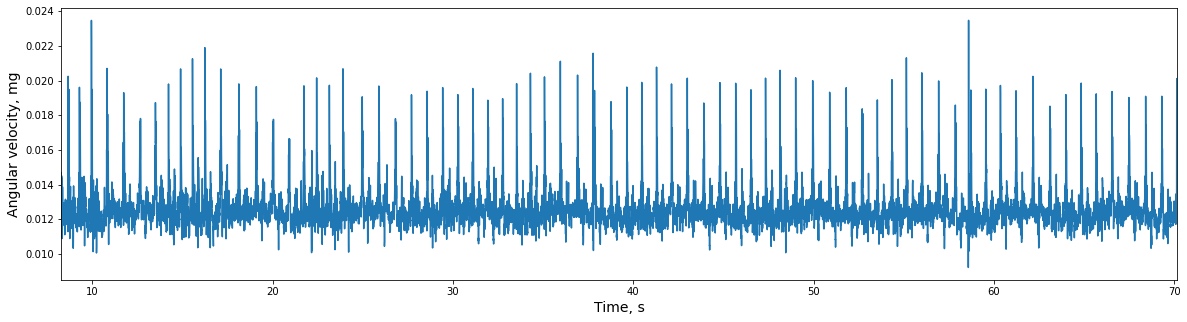

In [47]:
plt.figure(figsize=(20,5))
plt.plot(data_GR_R['Time'], data_GR_R['GRR'])
plt.xlim(min(data_GR_R['Time']),max(data_GR_R['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Angular velocity, mg', fontsize=14)

Signal size: 12379
Peak Freq in range of 40BPM to 100 BPM is  1.1471039663947007 Beat per Sec
In BPM is 68.82623798368203


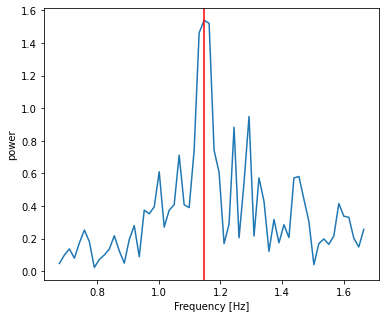

In [48]:
data_GyroR_R = np.asarray(data_GR_R['GRR'])

GR_R_fft = fftpack.fft(data_GyroR_R)
print("Signal size:",data_GyroR_R.size)
# And the power (sig_fft is of complex dtype)
power_GR_R = np.abs(GR_R_fft)

timestep = 1/200
# The corresponding frequencies
sample_freq_GR_R = fftpack.fftfreq(data_GyroR.size, d=timestep)
#print(sample_freq)

# Adjust mask to freq of heart beat (40bpm and  100 bpm) translate it to sec
pos_mask_GR_R = np.where((40/60 <= sample_freq_GR_R) & (sample_freq_GR_R <= 100/60) )
# pos_mask = np.where(sample_freq > 0)
freqs_GR_R = sample_freq_GR_R[pos_mask_GR_R]
peak_freq_GR_R = freqs_GR_R[power_GR_R[pos_mask_GR_R].argmax()]

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(freqs_GR_R, power_GR_R[pos_mask_GR_R])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.axvline(peak_freq_GR_R, color='red')

print("Peak Freq in range of 40BPM to 100 BPM is ", peak_freq_GR_R, "Beat per Sec")
print("In BPM is", peak_freq_GR_R*60)

Invert FFT if we cut out freq bigger than our peak freq


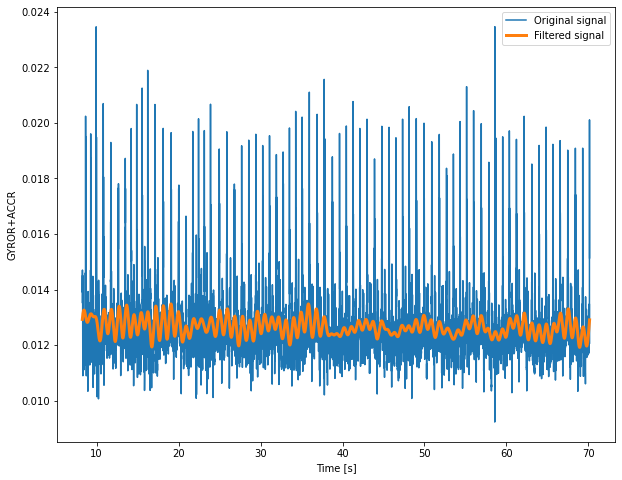

In [49]:
high_freq_fft_GR_R = GR_R_fft.copy()
high_freq_fft_GR_R[(np.abs(sample_freq_GR_R) >= peak_freq_GR_R)] = 0
filtered_sig_GR_R = fftpack.ifft(high_freq_fft_GR_R).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], data_GyroR_R, label='Original signal')
plt.plot(cs['Time'], filtered_sig_GR_R, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('GYROR+ACCR')

plt.legend(loc='best')
print("Invert FFT if we cut out freq bigger than our peak freq")

Just Signal between 40 - 100 BPM


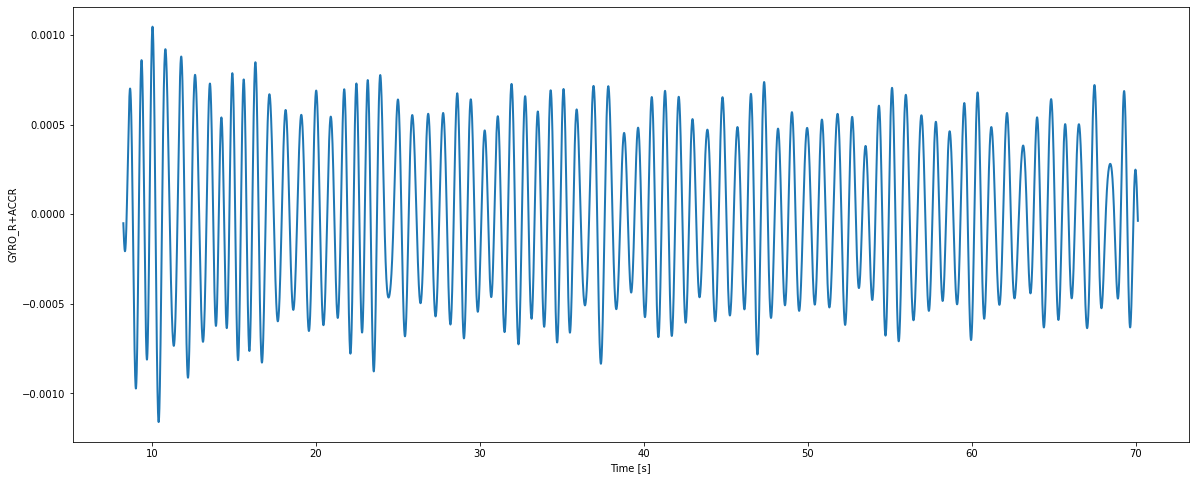

In [50]:
blocked_fft_GR_R = GR_R_fft.copy()
blocked_fft_GR_R[(np.abs(sample_freq_GR_R) >= 100/60)] = 0
blocked_fft_GR_R[(np.abs(sample_freq_GR_R) <= 40/60)] = 0
blocked_GR_R = fftpack.ifft(blocked_fft_GR_R).real


plt.figure(figsize=(20, 8))
plt.plot(cs['Time'], blocked_GR_R, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('GYRO_R+ACCR')

print("Just Signal between 40 - 100 BPM")

In [51]:
import scipy.signal as signal

In [52]:
# butterworth filtering

# sos = signal.butter(4, [40/60,100/60], 'bp', fs=200, output='sos')
# filtered = signal.sosfilt(sos, data_GyroR_R)
# plt.plot(cs['Time'],filtered)

# plt.show()

In [53]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


0.0
0.0024599354488478373
0.002459935434488067
0.002459935434488067
0.002459935434488067
0.002459935434488067
0.002459935434488067


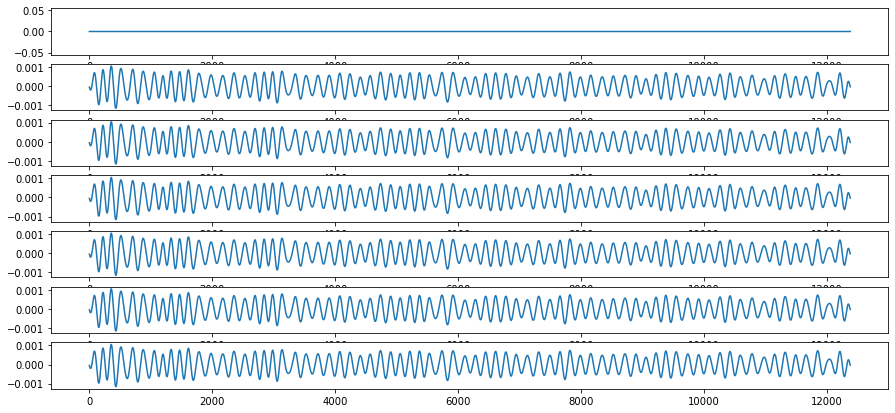

In [54]:
# i'm still a bit unsure over this. I'll work on this further 
# corr to chose the right level, pick level with max corr
# value of i written below in level+1 bcs itteration starts with 0 
i = 7
# coef = pywt.wavedec(blocked_GR_R, 'rbio3.9', level=i )
fig,ax = plt.subplots(nrows  = i, figsize = (15,7))

for k in range(i):
    coef = pywt.wavedec(blocked_GR_R, 'rbio3.9', level=k )
    if k != 1: 
        coef[k] = np.zeros_like(coef[k])    
    yx = pywt.waverec( coef, 'rbio3.9' )
    corr = np.sum(np.dot(yx[0:12379],blocked_GR_R))
    print(corr)
    ax[k].plot(yx)

<function matplotlib.pyplot.show(close=None, block=None)>

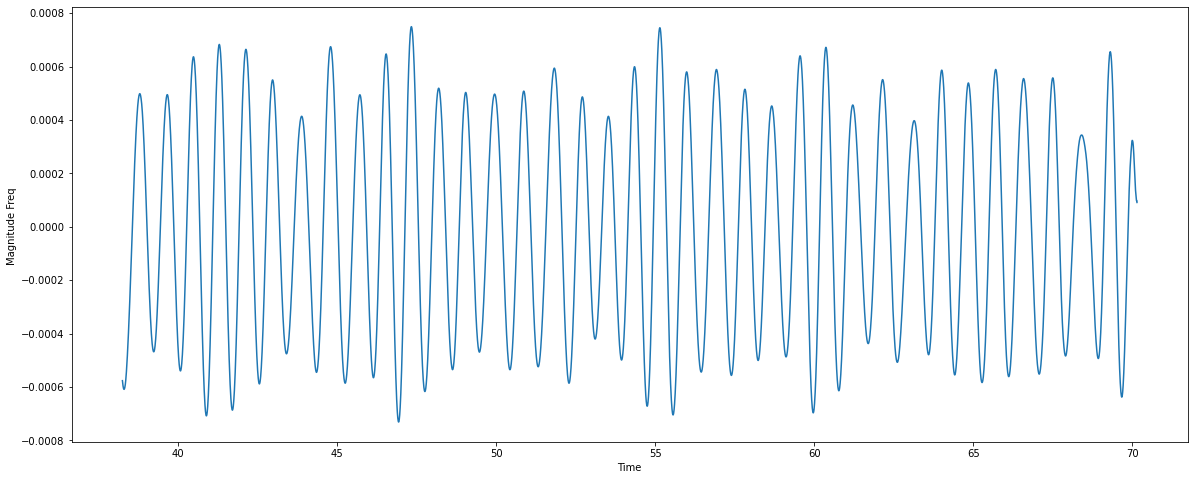

In [55]:
# this the neat one
i = 7
coef = pywt.wavedec(blocked_GR_R , 'rbio3.9', level=i )

for k in range (i):
    if (k != 1)&(k != 2)&(k != 3): 
        coef[k] = np.zeros(coef[k].shape)

# cd 7 has value, the rest is 0
yx = pywt.waverec( coef, 'rbio3.9' )
plt.figure(figsize=(20, 8))
plt.plot(cs['Time'][6000:12379], yx[6000:12379]) #blocked the time frame to see the wave better
plt.xlabel ("Time")
plt.ylabel ("Magnitude Freq ") #not sure this is the right name for the y axis
plt.show

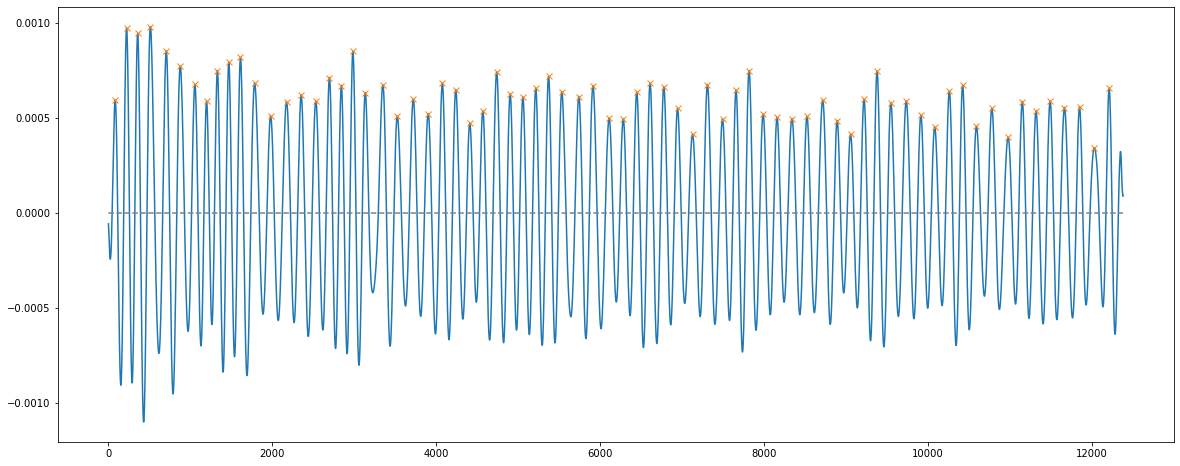

In [56]:
x = yx
peaks, _ = find_peaks(x, width = 50) 
plt.figure(figsize=(20, 8))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [57]:
# BPM calculation based on peak detection
num_peak = len(peaks)
time  = cs['Time'].max() - cs['Time'].min()
bpm = num_peak/time*60 #times 60 for bpm
print('BPM is', bpm)

BPM is 69.80126030053322


Text(0.5, 0, 'HRV (second)')

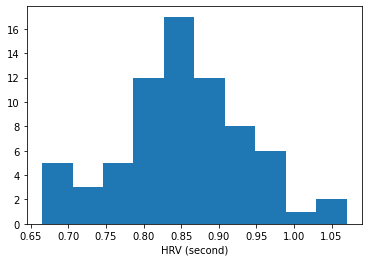

In [58]:
# histogram of HRV
times = np.asarray(cs['Time'])
hrv = np.zeros(len(peaks)-1)
for i in range (len(hrv)):
    hrv[i] = times[peaks[i+1]] - times[peaks[i]] 


value_hrv, bins_hrv, _ = plt.hist(hrv,bins='auto')#int(len(hrv)**0.5))
plt.xlabel ("HRV (second)")

Text(0.5, 0, 'HBM')

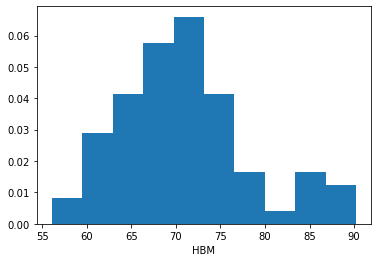

In [59]:
# histogram of BPM
value_heart, bins_heart, _ = plt.hist(1/hrv*60,bins='auto', density = True, stacked = True)#int(len(hrv)**0.5))
plt.xlabel ("HBM")

Fitting the histograms

In [60]:
from scipy.optimize import curve_fit

HRV fitting

[0.68525 0.72575 0.76625 0.80675 0.84725 0.88775 0.92825 0.96875 1.00925
 1.04975]
[ 5.  3.  5. 12. 17. 12.  8.  6.  1.  2.]
Gaussian
[13.31081336  0.85296345  0.05084839  2.91127665]
[[ 2.48398284e+00  2.00683378e-06 -1.72277711e-03 -6.39922484e-01]
 [ 2.00683378e-06  3.95033884e-05  1.24570100e-08 -2.56461627e-06]
 [-1.72277711e-03  1.24570100e-08  6.56949935e-05 -4.86249910e-03]
 [-6.39922484e-01 -2.56461627e-06 -4.86249910e-03  9.02607219e-01]]
Cauchy
[3.05604275 0.85121119 0.06082514 0.95873702]
[[ 6.38531301e-01 -8.99961091e-05  1.00463591e-02 -1.06249767e+00]
 [-8.99961091e-05  3.44906061e-05 -2.49846280e-06  9.66161095e-05]
 [ 1.00463591e-02 -2.49846280e-06  1.92507266e-04 -1.59597516e-02]
 [-1.06249767e+00  9.66161095e-05 -1.59597516e-02  2.05446432e+00]]
Double exponential
[2.92847057 0.85320747 0.08056994 0.420595  ]
[[ 1.97439735e+00 -2.20542877e-03  4.57469052e-02 -3.65677645e+00]
 [-2.20542877e-03  3.87136802e-05 -7.53339417e-05  4.14680280e-03]
 [ 4.57469052e-02 -7.53339

(0.6, 1.1)

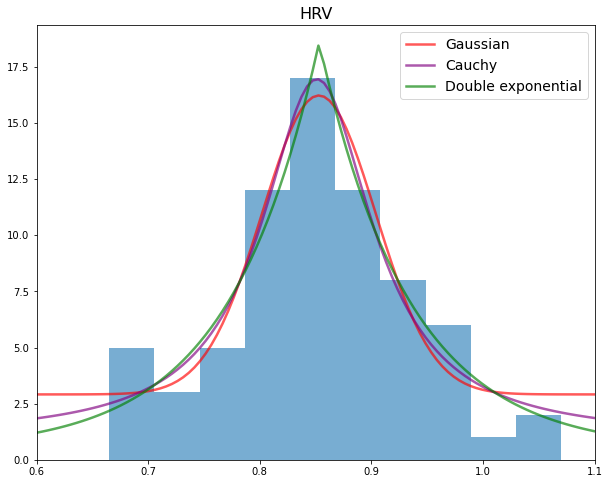

In [114]:
#I want to try to fit with Gaussian, Cauchy, Double exponenetial

def Gauss(x,A,mu,sigma,B):
    return A*np.exp(-(x - mu)**2/(2 * sigma**2)) + B

def Cauchy(x,A,t,s,B):
    return A/(s*np.pi*(1 + ((x-t)/s)**2 )) + B

def Double_exp(x,A,mu,b,B):
    return A*np.exp(-np.abs( (x-mu)/b ))/(2*b) + B

##hrv part
bins_mean_hrv=np.zeros(len(bins_hrv)-1)
for i in range(len(bins_hrv)-1):
    bins_mean_hrv[i] = (bins_hrv[i+1]+bins_hrv[i])/2
    
print(bins_mean_hrv)
print(value_hrv)

opt_gauss, cov_gauss = curve_fit(Gauss, xdata=bins_mean_hrv, ydata=value_hrv, p0=[16, 0.85, 0.1, 2])
print('Gaussian')
print(opt_gauss)
print(cov_gauss)


opt_cauchy, cov_cauchy = curve_fit(Cauchy, xdata=bins_mean_hrv, ydata=value_hrv, p0=[16, 0.85, 0.1, 2])
print('Cauchy')
print(opt_cauchy)
print(cov_cauchy)

opt_dexp, cov_dexp = curve_fit(Double_exp, xdata=bins_mean_hrv, ydata=value_hrv, p0=[16, 0.85, 0.1, 2])
print('Double exponential')
print(opt_dexp)
print(cov_dexp)


xspace = np.linspace(0.6,1.1,100)
plt.figure(figsize=(10,8))
plt.hist(hrv, bins='auto', alpha=0.6)
plt.plot(xspace, Gauss(xspace, *opt_gauss), color='red', linewidth=2.5, label='Gaussian', alpha=0.65)
plt.plot(xspace, Cauchy(xspace, *opt_cauchy), color='purple', linewidth=2.5, label='Cauchy', alpha=0.65)
plt.plot(xspace, Double_exp(xspace, *opt_dexp), color='green', linewidth=2.5, label='Double exponential', alpha=0.65)
plt.legend(loc='best', fontsize=14)
plt.title('HRV', fontsize=16)
plt.xlim(0.6,1.1)

All in all: Cauchy is the best

Fitting heart rate histogram

In [62]:
# # histogram of BPM try fitted with fitted
# from fitter import Fitter
# height, bins,patches = plt.hist(1/hrv*60,bins='auto', density = True, stacked = True)#int(len(hrv)**0.5))
# plt.xlim(35,110)
# plt.xlabel ("HBM")

# f = Fitter(height,
#            distributions=['gamma',
#                           'rayleigh',
#                           'normal'])
# f.fit()
# f.summary()

Gaussian
[ 5.57011239e-02  6.96017613e+01 -4.73706852e+00  9.94909257e-03]
[[ 3.21337002e-05  1.43405809e-05  1.81918572e-04 -1.04241228e-05]
 [ 1.43405809e-05  2.36583281e-01 -1.92099968e-03 -1.82394953e-05]
 [ 1.81918572e-04 -1.92099968e-03  4.30435880e-01  1.66319442e-03]
 [-1.04241228e-05 -1.82394953e-05  1.66319442e-03  1.43083879e-05]]
Log
[7.30045204e-01 6.97852257e+01 2.22461014e+01 8.12514883e-03]
[[ 2.79685264e-02  1.72985386e-02 -6.15945078e-01 -7.79149151e-04]
 [ 1.72985386e-02  3.13373438e-01 -4.00664359e-01 -4.88914461e-04]
 [-6.15945078e-01 -4.00664359e-01  1.82459733e+01  1.69175824e-02]
 [-7.79149151e-04 -4.88914461e-04  1.69175824e-02  2.68341298e-05]]


(56.0, 90.0)

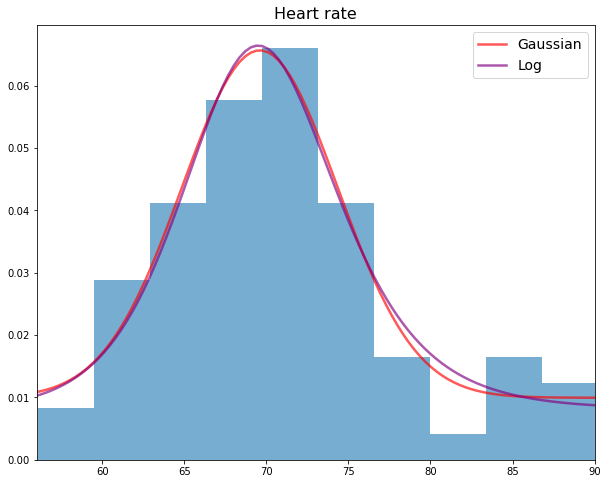

In [117]:
import scipy as sp
import scipy.stats as stats



def Gamma(x,A,mu,b):
    g = 4
    return ((x-mu)/b)**(g-1)*np.exp(-(x-mu)/b)*A/(b*sp.special.gamma(g))


def Log_Logistics(x,A,a,b,B):
    return A*(b/a)*(x/a)**(b-1)/(1 + (x/a)**b)**2 + B



bins_mean_heart=np.zeros(len(bins_heart)-1)
for i in range(len(bins_heart)-1):
    bins_mean_heart[i] = (bins_heart[i+1]+bins_heart[i])/2

opt_gauss, cov_gauss = curve_fit(Gauss, xdata=bins_mean_heart, ydata=value_heart, p0=[0.1, 70, 10, 0.2])
print('Gaussian')
print(opt_gauss)
print(cov_gauss)

#opt_invgauss, cov_invgauss = curve_fit(Inverse_Gauss, xdata=bins_mean_heart, ydata=value_heart, p0=[0.1, 70])
#print('Inverse Gauss')
#print(opt_invgauss)
#print(cov_invgauss)

#opt_gamma, cov_gamma = curve_fit(Gamma, xdata=bins_mean_heart, ydata=value_heart, p0=[2, 40, 5])
#print('Gamma')
#print(opt_gamma)
#print(cov_gamma)


opt_log, cov_log = curve_fit(Log_Logistics, xdata=bins_mean_heart, ydata=value_heart, p0=[1, 70, 20,0.1])
print('Log')
print(opt_log)
print(cov_log)


xspace = np.linspace(56,90,100)
plt.figure(figsize=(10,8))
plt.hist(1/hrv*60, bins='auto', alpha=0.6, density=True)
plt.plot(xspace, Gauss(xspace, *opt_gauss), color='red', linewidth=2.5, label='Gaussian', alpha=0.65)
plt.plot(xspace, Log_Logistics(xspace, *opt_log), color='purple', linewidth=2.5, label='Log', alpha=0.65)
#plt.plot(xspace, Gamma(xspace, *opt_gamma), color='green', linewidth=2.5, label='Gamma', alpha=0.65)
plt.legend(loc='best', fontsize=14)
plt.title('Heart rate', fontsize=16)
plt.xlim(56,90)

I a bit suffered with it, but here just Gaussian. From fitting heart rate is 69.6

Now a bit of cwt

73  peaks were found


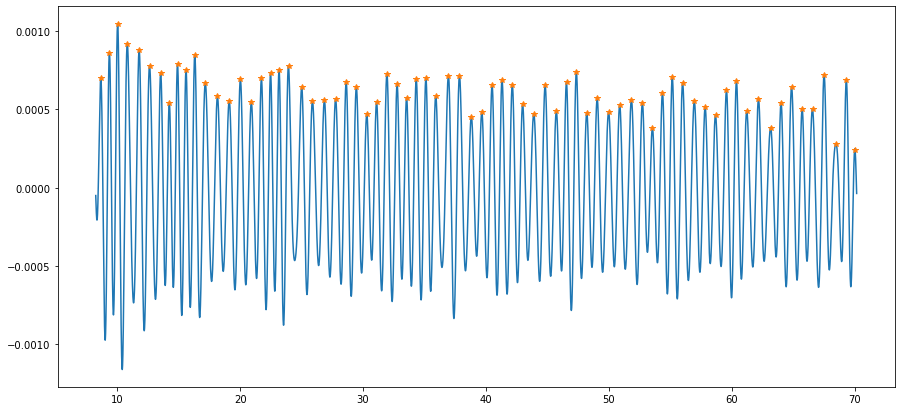

In [135]:
from scipy import signal
peakind = signal.find_peaks_cwt(blocked_GR_R, np.arange(35,50), window_size = 20)
temp = np.array(cs['Time'][peakind])
fig,ax = plt.subplots( figsize=(15,7) )
ax.plot(cs['Time'],blocked_GR_R,'-')
ax.plot(temp, blocked_GR_R[peakind],'*')
print(len(peakind),' peaks were found')

Gaussian
[6.06878081e-02 7.01146606e+01 4.27590926e+00 1.02412464e-02]
[[ 1.10018433e-04 -5.43322406e-06 -1.44428673e-03 -2.81133056e-05]
 [-5.43322406e-06  5.96306630e-01  5.95927802e-03 -2.78944988e-05]
 [-1.44428673e-03  5.95927802e-03  9.74715086e-01 -3.86885886e-03]
 [-2.81133056e-05 -2.78944988e-05 -3.86885886e-03  3.92972407e-05]]
Log
[6.71764870e-01 7.03337905e+01 2.66845782e+01 9.67488057e-03]
[[ 4.28827734e-02  3.11453609e-02 -1.25094623e+00 -1.23246381e-03]
 [ 3.11453609e-02  6.17414331e-01 -1.20681308e+00 -8.98362427e-04]
 [-1.25094623e+00 -1.20681308e+00  5.41605685e+01  3.56799480e-02]
 [-1.23246381e-03 -8.98362427e-04  3.56799480e-02  4.94228039e-05]]
Cauchy
[3.05604275 0.85121119 0.06082514 0.95873702]
[[ 6.38531301e-01 -8.99961091e-05  1.00463591e-02 -1.06249767e+00]
 [-8.99961091e-05  3.44906061e-05 -2.49846280e-06  9.66161095e-05]
 [ 1.00463591e-02 -2.49846280e-06  1.92507266e-04 -1.59597516e-02]
 [-1.06249767e+00  9.66161095e-05 -1.59597516e-02  2.05446432e+00]]


(56.0, 90.0)

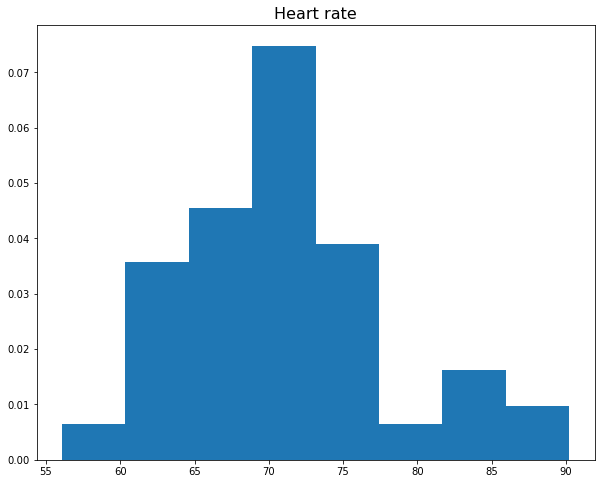

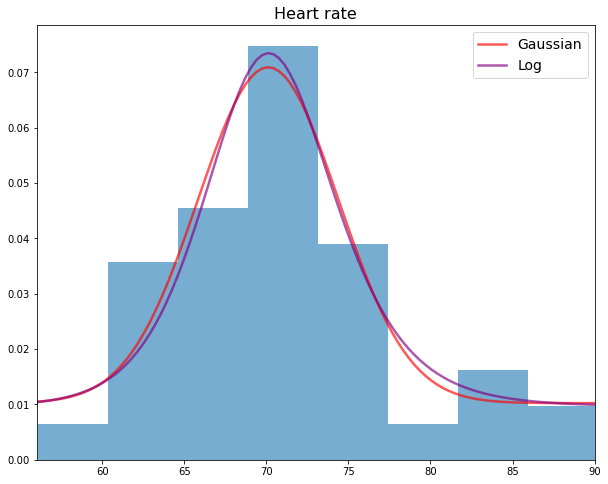

In [144]:
exp_freq = 1/(temp[1:] - temp[:(-1)])
plt.figure(figsize=(10,8))
value_heart, bins_heart, _ = plt.hist(exp_freq*60, bins=int(np.sqrt(len(exp_freq))),density=True)
plt.title('Heart rate', fontsize=16)


bins_mean_heart=np.zeros(len(bins_heart)-1)
for i in range(len(bins_heart)-1):
    bins_mean_heart[i] = (bins_heart[i+1]+bins_heart[i])/2
    
    
opt_gauss, cov_gauss = curve_fit(Gauss, xdata=bins_mean_heart, ydata=value_heart, p0=[0.1, 70, 10, 0.2])
print('Gaussian')
print(opt_gauss)
print(cov_gauss)

opt_log, cov_log = curve_fit(Log_Logistics, xdata=bins_mean_heart, ydata=value_heart, p0=[1, 70, 20,0.1])
print('Log')
print(opt_log)
print(cov_log)

opt_cauchy, cov_cauchy = curve_fit(Cauchy, xdata=bins_mean_hrv, ydata=value_hrv, p0=[16, 0.85, 0.1, 2])
print('Cauchy')
print(opt_cauchy)
print(cov_cauchy)


xspace = np.linspace(56,90,100)
plt.figure(figsize=(10,8))
plt.hist(exp_freq*60, bins=int(np.sqrt(len(exp_freq))), alpha=0.6, density=True)
plt.plot(xspace, Gauss(xspace, *opt_gauss), color='red', linewidth=2.5, label='Gaussian', alpha=0.65)
plt.plot(xspace, Log_Logistics(xspace, *opt_log), color='purple', linewidth=2.5, label='Log', alpha=0.65)
plt.legend(loc='best', fontsize=14)
plt.title('Heart rate', fontsize=16)
plt.xlim(56,90)

Still Gaussian is better, heart rate: 70.1

# Analysis of Acc_X

Text(0, 0.5, 'Acceleration, mg')

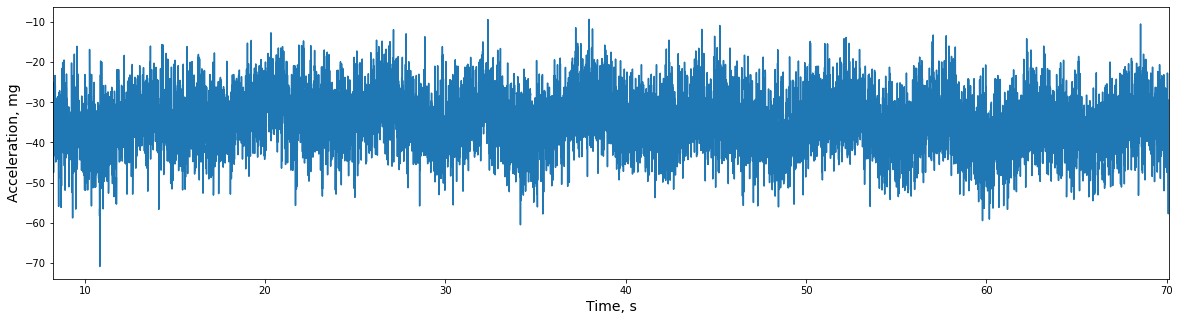

In [64]:
#statistical analysis of acc_x

plt.figure(figsize=(20,5))
plt.plot(cs['Time'], cs['AccX'])
plt.xlim(min(cs['Time']),max(cs['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Acceleration, mg', fontsize=14)

In [65]:
print('Statistical analysis')
print(cs['AccX'].describe())
print('median', cs['AccX'].median())
print('variance', cs['AccX'].var())

Statistical analysis
count    12379.000000
mean       -34.677682
std          7.021214
min        -70.846942
25%        -39.309942
50%        -34.612942
75%        -29.976942
max         -9.358942
Name: AccX, dtype: float64
median -34.612942
variance 49.29745129528079


# All data statistical quantities of Center Sternum

In [66]:
stq = pd.DataFrame({'mean': cs.mean(),
                   'median': cs.median(),
                   'variance': cs.var(),
                   'standard deviation': cs.std(),
                   '25th percentile': cs.quantile(q=0.25),
                   '75th percentiles': cs.quantile(q=0.75)})
display(stq)

,mean,median,variance,standard deviation,25th percentile,75th percentiles
Time,39.200000,39.200000,319.275042,17.868269,23.727500,54.672500
AccX,-34.677682,-34.612942,49.297451,7.021214,-39.309942,-29.976942
AccY,101.770017,101.909210,28.627036,5.350424,98.310210,105.325210
AccZ,-888.587312,-888.972540,210.330291,14.502768,-897.268540,-880.737540
GyroX,-2.089004,-2.152672,2.061175,1.435679,-2.687023,-1.480916
GyroY,3.682129,3.633588,0.524791,0.724425,3.267176,4.000000
GyroZ,-0.865798,-0.854962,0.134305,0.366476,-1.099237,-0.625954


In [67]:
cs.corr()

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
Time,1.000000,-0.086022,0.524123,0.262656,-0.039175,-0.054312,-0.026903
AccX,-0.086022,1.000000,-0.176537,-0.405237,0.207113,0.008637,0.024947
AccY,0.524123,-0.176537,1.000000,0.171794,-0.053377,-0.008125,-0.142546
AccZ,0.262656,-0.405237,0.171794,1.000000,-0.080377,0.115635,0.019117
GyroX,-0.039175,0.207113,-0.053377,-0.080377,1.000000,0.403676,0.390208
GyroY,-0.054312,0.008637,-0.008125,0.115635,0.403676,1.000000,0.436808
GyroZ,-0.026903,0.024947,-0.142546,0.019117,0.390208,0.436808,1.000000


In [68]:
cs[['GyroX','GyroY','GyroZ']]

,GyroX,GyroY,GyroZ
0,-3.297710,3.847328,-0.687023
1,-3.801527,4.381680,-0.595420
2,-3.847328,4.351145,0.045802
3,-3.954199,4.412214,0.259542
4,-4.167939,3.480916,0.015267
...,...,...,...
12374,-3.312977,1.984733,-0.977099
12375,-7.282443,1.938931,-1.480916
12376,-8.870229,2.564886,-1.450382
12377,-7.129771,3.648855,-1.389313


Because this is a presentation, i figure to plot the data distribution. 
One of the plotting idea that i came out with is this below. 
If this is okay i'll copy the plot to the Mattress Supine.

<AxesSubplot:xlabel='AccX', ylabel='Count'>

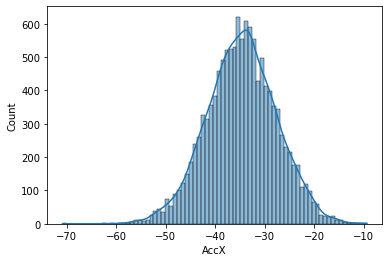

In [69]:
sns.histplot(cs['AccX'], kde = True)

# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(cs['AccY'],ax=ax_box)
# sns.histplot(cs['AccY'], kde = True, ax=ax_hist)
# ax_box.set(xlabel='AccY')
# plt.show()

# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(cs['AccZ'],ax=ax_box)
# sns.histplot(cs['AccZ'], kde = True, ax=ax_hist)
# ax_box.set(xlabel='AccZ')
# plt.show()

Since we wont take the gyro, i'll just comment the codes below and leave it here in case. 

In [70]:
# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(cs['GyroX'],ax=ax_box)
# sns.histplot(cs['GyroX'], kde = True, ax=ax_hist)
# ax_box.set(xlabel='GyroX')
# plt.show()

# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(cs['GyroY'],ax=ax_box)
# sns.histplot(cs['GyroY'], kde = True, ax=ax_hist)
# ax_box.set(xlabel='GyroY')
# plt.show()

# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(cs['GyroZ'],ax=ax_box)
# sns.histplot(cs['GyroZ'], kde = True, ax=ax_hist)
# ax_box.set(xlabel='GyroZ')
# plt.show()

# FFT Center Sternum

2.2. Fourier Analysis: Perform a frequency analysis of the data. Look at the spectrum and explain what you see. Use this step in order to properly design the filters in the following step.



My current understanding about the FFT: 
1. If we find the FFT with maximum amplitude in all positive domain, we will get the "envelope"/prominent frequency (wording envelope a bit sketchy) and it is a low freq 0.008
2. Our BPM freq is not the most prominent one so I looked out for our BPM around heart beat freq range which is 40 - 100 BPM
3. For next task filtering, maybe we can filter around 40 - 100 BPM maybe?

In [71]:
cs_accx = cs['AccX']

Signal size: 12379
Peak Freq in range of 40BPM to 100 BPM is  1.163260360287584 Beat per Sec
In BPM is 69.79562161725504


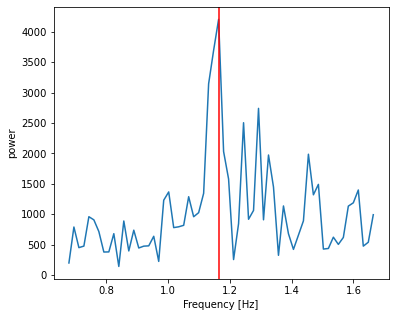

In [72]:
# The FFT of the signal X around the area of heart beat frequencies
cs_AccX = np.asarray(cs['AccX'])

sig_fft_x = fftpack.fft(cs_AccX)
print("Signal size:",cs_AccX.size)
# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft_x)

timestep = 1/200
# The corresponding frequencies
sample_freq_x = fftpack.fftfreq(cs_AccX.size, d=timestep)
#print(sample_freq)

# Adjust mask to freq of heart beat (40bpm and  100 bpm) translate it to sec
pos_mask = np.where((40/60 <= sample_freq_x) & (sample_freq_x <= 100/60) )
# pos_mask = np.where(sample_freq > 0)
freqs_x = sample_freq_x[pos_mask]
peak_freq_x = freqs_x[power[pos_mask].argmax()]

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(freqs_x, power[pos_mask])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.axvline(peak_freq_x, color='red')

print("Peak Freq in range of 40BPM to 100 BPM is ", peak_freq_x , "Beat per Sec")
print("In BPM is", peak_freq_x*60)

Prev, with only Z, maybe our patience BPM around 68.8. 
Now with X only, 69.79 BPM

Invert FFT if we cut out freq bigger than our peak freq


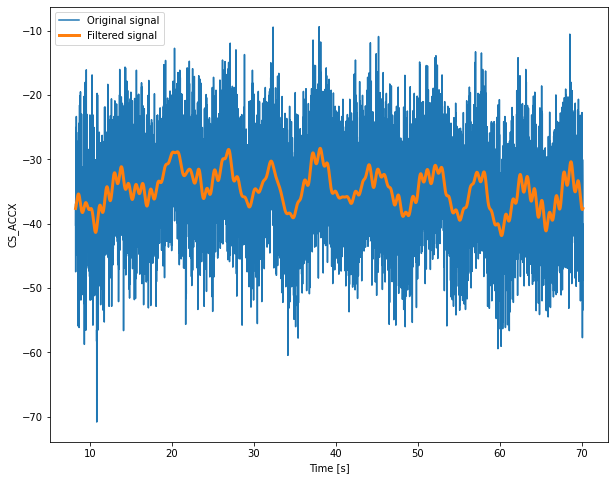

In [73]:
high_freq_fft_x = sig_fft_x.copy()
high_freq_fft_x[(np.abs(sample_freq_x) >= peak_freq_x)] = 0
filtered_sig_x = fftpack.ifft(high_freq_fft_x).real


plt.figure(figsize=(10, 8))
plt.plot(cs['Time'], cs_AccX, label='Original signal')
plt.plot(cs['Time'], filtered_sig_x, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('CS_ACCX')

plt.legend(loc='best')
print("Invert FFT if we cut out freq bigger than our peak freq")

Text(0, 0.5, 'CS_ACCX')

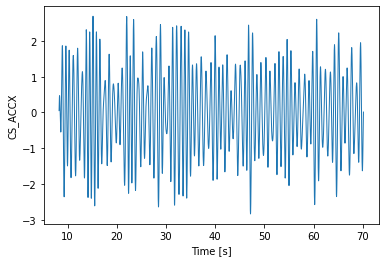

In [74]:
# Freq between 40BPM to 100 BPM
blocked_freq_fft_x = sig_fft_x.copy()
blocked_freq_fft_x[(np.abs(sample_freq_x) >= 100/60)] = 0
blocked_freq_fft_x[(np.abs(sample_freq_x) <= 40/60)] = 0

filter_sigs_x = fftpack.ifft(blocked_freq_fft_x).real

plt.plot(cs['Time'], filter_sigs_x, linewidth=1, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('CS_ACCX')

# Mattress data to be analysed here

In [75]:
### README5 smth mattress data
acc_offsets5 = np.array([3.602701, -20.96658, 54.97186])
ms['AccX'] += acc_offsets5[0]
ms['AccY'] += acc_offsets5[1]
ms['AccZ'] += acc_offsets5[2]

In [76]:
display(ms)

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.000,950.688701,414.69542,125.60986,-6.824428,-14.244280,1.404580
1,0.005,972.770701,366.81042,143.84886,6.183206,-12.290080,-7.969466
2,0.010,993.205701,359.36842,133.72286,11.709920,-4.961832,-7.450382
3,0.015,958.496701,397.06642,143.29986,17.877860,2.519084,-5.984733
4,0.020,975.698701,406.76542,154.82886,25.221370,5.404580,4.015267
...,...,...,...,...,...,...,...
16501,82.505,962.095701,270.12542,0.68186,1.664122,2.305344,-0.671756
16502,82.510,958.252701,267.07542,5.31786,1.480916,2.488550,-0.702290
16503,82.515,970.940701,269.51542,-8.89514,1.114504,3.374046,-0.900763
16504,82.520,969.232701,279.88542,-1.27014,0.702290,3.664122,-1.587786


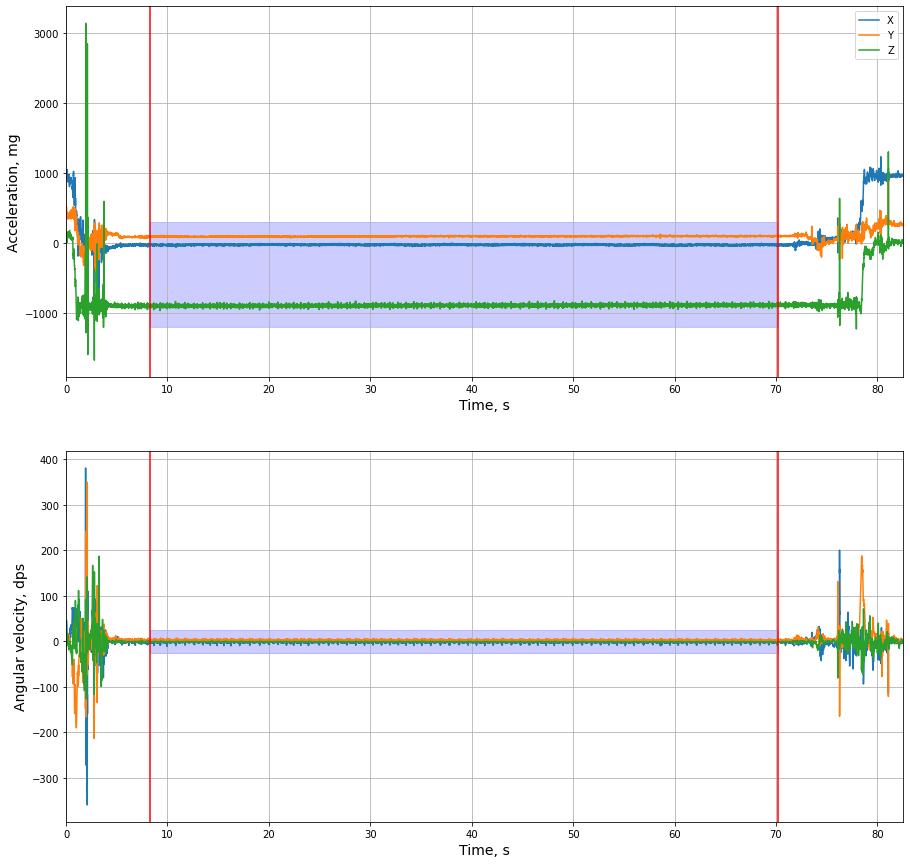

In [77]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)

down_limit = 0.1*max(ms['Time']) #I was exploring it visually with step 0.05
up_limit = 0.85*max(ms['Time'])
fill0 = np.arange(-1200,300)  #y range of the highlited visual aid for fig 0
fill1 = np.arange(-25,25) #y range of the highlited visual aid for fig 1

ax[0].plot(ms['Time'], ms['AccX'], label='X')
ax[0].plot(ms['Time'], ms['AccY'], label='Y')
ax[0].plot(ms['Time'], ms['AccZ'], label='Z')
ax[0].set_xlim(min(ms['Time']),max(ms['Time']))
ax[0].set_xlabel('Time, s', fontsize=14)
ax[0].set_ylabel('Acceleration, mg', fontsize=14)
ax[0].axvline(down_limit, color='red')
ax[0].axvline(up_limit, color='red')
ax[0].legend()
ax[0].grid()
ax[0].fill_betweenx(fill0,down_limit,up_limit, color='blue', alpha =0.2)


ax[1].plot(ms['Time'], ms['GyroX'], label='X')
ax[1].plot(ms['Time'], ms['GyroY'], label='Y')
ax[1].plot(ms['Time'], ms['GyroZ'], label='Z')
ax[1].set_xlim(min(ms['Time']),max(ms['Time']))
ax[1].set_xlabel('Time, s', fontsize=14)
ax[1].set_ylabel('Angular velocity, dps', fontsize=14)
ax[1].axvline(down_limit, color='red')
ax[1].axvline(up_limit, color='red')
ax[1].grid()
ax[1].fill_betweenx(fill1,down_limit,up_limit, color='blue', alpha =0.2)


In [78]:
#dropping data

ms.drop(ms[ ms['Time']<= down_limit].index, inplace=True)
ms.drop(ms[ ms['Time']>= up_limit].index, inplace=True)
ms

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
1651,8.255,-32.692299,96.76342,-914.07414,-3.297710,3.847328,-0.687023
1652,8.260,-29.337299,99.14242,-930.60514,-3.801527,4.381680,-0.595420
1653,8.265,-39.951299,85.84442,-892.35814,-3.847328,4.351145,0.045802
1654,8.270,-28.788299,89.80942,-908.64514,-3.954199,4.412214,0.259542
1655,8.275,-30.130299,87.97942,-900.34914,-4.167939,3.480916,0.015267
...,...,...,...,...,...,...,...
14025,70.125,-41.293299,109.26842,-915.90414,-3.312977,1.984733,-0.977099
14026,70.130,-39.402299,107.56042,-905.90014,-7.282443,1.938931,-1.480916
14027,70.135,-32.509299,103.22942,-857.77114,-8.870229,2.564886,-1.450382
14028,70.140,-39.707299,101.64342,-850.45114,-7.129771,3.648855,-1.389313


# Analysis of Acc_Z Mattress Supine

Text(0, 0.5, 'Acceleration, mg')

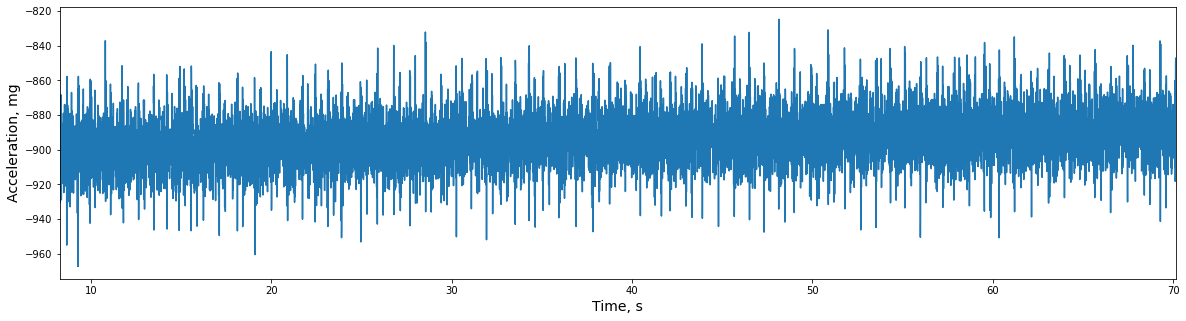

In [79]:
#statistical analysis of acc_z

plt.figure(figsize=(20,5))
plt.plot(ms['Time'], ms['AccZ'])
plt.xlim(min(ms['Time']),max(ms['Time']))
plt.xlabel('Time, s', fontsize=14)
plt.ylabel('Acceleration, mg', fontsize=14)

# All data statistical quantities

In [80]:
stq = pd.DataFrame({'mean': ms.mean(),
                   'median': ms.median(),
                   'variance': ms.var(),
                   'standard deviation': ms.std(),
                   '25th percentile': ms.quantile(q=0.25),
                   '75th percentiles': ms.quantile(q=0.75)})
display(stq)

,mean,median,variance,standard deviation,25th percentile,75th percentiles
Time,39.200000,39.200000,319.275042,17.868269,23.727500,54.672500
AccX,-27.145039,-27.080299,49.297451,7.021214,-31.777299,-22.444299
AccY,94.550227,94.689420,28.627036,5.350424,91.090420,98.105420
AccZ,-894.290912,-894.676140,210.330291,14.502768,-902.972140,-886.441140
GyroX,-2.089004,-2.152672,2.061175,1.435679,-2.687023,-1.480916
GyroY,3.682129,3.633588,0.524791,0.724425,3.267176,4.000000
GyroZ,-0.865798,-0.854962,0.134305,0.366476,-1.099237,-0.625954


In [81]:
ms.corr()

,Time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
Time,1.000000,-0.086022,0.524123,0.262656,-0.039175,-0.054312,-0.026903
AccX,-0.086022,1.000000,-0.176537,-0.405237,0.207113,0.008637,0.024947
AccY,0.524123,-0.176537,1.000000,0.171794,-0.053377,-0.008125,-0.142546
AccZ,0.262656,-0.405237,0.171794,1.000000,-0.080377,0.115635,0.019117
GyroX,-0.039175,0.207113,-0.053377,-0.080377,1.000000,0.403676,0.390208
GyroY,-0.054312,0.008637,-0.008125,0.115635,0.403676,1.000000,0.436808
GyroZ,-0.026903,0.024947,-0.142546,0.019117,0.390208,0.436808,1.000000


# FFT Mattress Supine

Signal size: 12379
Peak Freq in range of 40BPM to 100 BPM is  1.1471039663947007 Beat per Sec
In BPM is 68.82623798368203


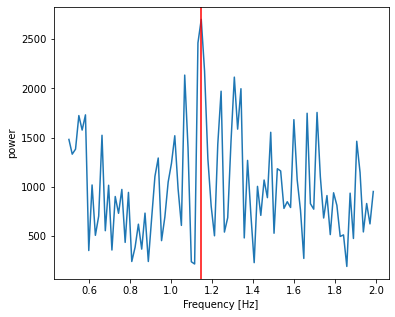

In [82]:
# The FFT of the signal Z around the area of heart beat frequencies
ms_AccZ = np.asarray(ms['AccZ'])
sig_fft_ms = fftpack.fft(ms_AccZ)
print("Signal size:",ms_AccZ.size)
# And the power (sig_fft is of complex dtype)
powerz = np.abs(sig_fft_ms)

timestep = 1/200
# The corresponding frequencies
sample_freq_msz = fftpack.fftfreq(ms_AccZ.size, d=timestep)
#print(sample_freq)

# Adjust mask to freq of heart beat (30bpm and  120 bpm) translate it to sec
pos_mask_msz = np.where((30/60 <= sample_freq_msz) & (sample_freq_msz <= 120/60) )
# pos_mask = np.where(sample_freq > 0)
freqs_msz = sample_freq_msz[pos_mask_msz]
peak_freq_msz = freqs_msz[powerz[pos_mask_msz].argmax()]


# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(freqs_msz, powerz[pos_mask_msz])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.axvline(peak_freq_msz, color='red')

print("Peak Freq in range of 40BPM to 100 BPM is ", peak_freq_msz , "Beat per Sec")
print("In BPM is", peak_freq_msz*60)

Invert FFT if we cut out freq bigger than our peak freq


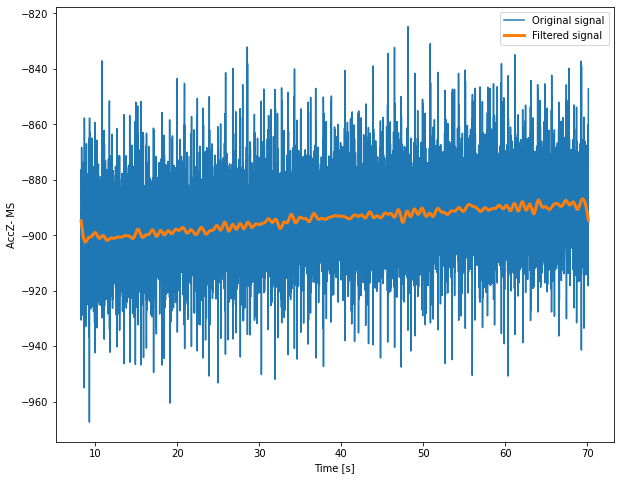

In [83]:
high_freq_fft = sig_fft_ms.copy()
high_freq_fft[np.abs(sample_freq_msz) >= peak_freq_msz] = 0
filtered_sig_msz = fftpack.ifft(high_freq_fft).real


plt.figure(figsize=(10, 8))
plt.plot(ms['Time'], ms_AccZ, label='Original signal')
plt.plot(ms['Time'], filtered_sig_msz, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('AccZ- MS')

plt.legend(loc='best')
print("Invert FFT if we cut out freq bigger than our peak freq")

idk why the mattress data and center sternum data FFT is very similar, i expected a bit differences but not sure so far 